Author: Riddhima Puri

22/07/2021

Comparison plots of PSG simulations with Venot et al. 2020 and Parmentier Kempton atmospheric templates and retrieved transmission spectrum from Santos et al. 2020. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Some styling changes
from pylab import rcParams
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams['figure.titleweight'] = 'bold'
rcParams['figure.titlesize'] = 'xx-large'
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['legend.fontsize'] = 'x-large'

In [2]:
def read_radfile(fname):
    
    data = open(fname, 'r' )
    data=data.read().splitlines()
    wavl=[] #Wavelength
    trans=[] #Transit
    tottrans=[] #Total Transit
    simtrans=[]
    info=[]
    info=[x for x in data if '#' in x]
    for i in range(len(info), len(data)):
        temp=[]
        temp=data[i].split(' ')
        wavl.append(float(temp[0])*1000.)
        tottrans.append(float(temp[2]))
        trans.append(float(temp[10]))
#         simtrans.append(float(temp[4]))
        
    return wavl, tottrans, trans

In [9]:
Rj=69911.
Rp=1.38*Rj
Rsun=696340.
Rs=1.162
Rs_er=0.02

In [10]:
1.38*69911

96477.18

In [11]:
#Load ESPRESSO data from Santos et al.

fname='out_transmission_4bin.txt'
data_es = open(fname, 'r' )
data_es=data_es.read().splitlines()

In [12]:
#ESPRESSO data

wavld_es=np.zeros(len(data_es)) #Wavelength down
wavlu_es=np.zeros(len(data_es)) #Wavelength up
Rp_es=np.zeros(len(data_es)) #Rp/R*
Rp_eru_es=np.zeros(len(data_es)) #Rp/R* error up
Rp_erd_es=np.zeros(len(data_es)) #Rp/R* error down

for i in range(1,len(data_es)):
    temp=[]
    temp=data_es[i].split(';')
    wavld_es[i]=float(temp[1])
    wavlu_es[i]=float(temp[2])
    Rp_es[i]=float(temp[3])
    Rp_eru_es[i]=float(temp[4])
    Rp_erd_es[i]=float(temp[5])


In [13]:
#Wavelength error bars
diff=np.zeros(len(wavlu_es))
for i in range(len(wavlu_es)):
    diff[i]=(wavlu_es[i]-wavld_es[i])/2

#Updated Error to get Transmission Spectra (square of Rp/R*)
test1=[]
test1=Rp_es+Rp_eru_es
Rp_eru_sq=test1**2-Rp_es**2

test2=[]
test2=Rp_es-Rp_erd_es
Rp_erd_sq= Rp_es**2-test2**2

In [14]:
#Load Sing et al. 2008 HST data 

fname='HD_209458b/Sing08_HD209458_STIS_lowres_bin16.txt'
data_hst = open(fname, 'r' )
data_hst=data_hst.read().splitlines()

In [15]:
wavl_hst=np.zeros(len(data_hst)) #Wavelength
Rp_hst=np.zeros(len(data_hst)) #Rp
Rper_hst=np.zeros(len(data_hst)) #Rp error
for i in range(len(data_hst)):
    temp=[]
    temp=data_hst[i].split('   ')
    wavl_hst[i]=float(temp[2])
    Rp_hst[i]=float(temp[4])
    Rper_hst[i]=float(temp[5])


<ErrorbarContainer object of 3 artists>

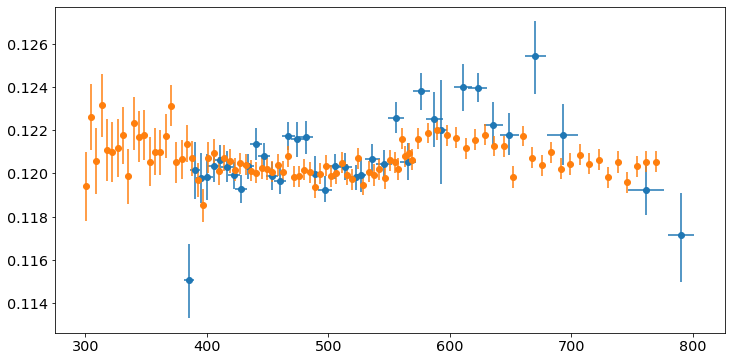

In [25]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)], 
             yerr=[Rp_eru_es[2:len(Rp_es)], Rp_erd_es[2:len(Rp_es)]], 
            xerr=diff[2:len(Rp_es)], marker='o', linestyle='', label='ESPRESSO')
ax.errorbar(wavl_hst*0.1, Rp_hst*Rj/(1.1*Rsun), 
             yerr=Rper_hst*Rj/(Rsun), marker='o', linestyle='', label='HST')


# Venot et al. (2020) Profiles

In [29]:
wavl1, tott1, trans1 = read_radfile('HD_209458b/psg_rad_Venot_Na_0_1ppm.txt')
wavl2, tott2, trans2 = read_radfile('HD_209458b/psg_rad_Venot_Na_1ppm.txt')
wavl3, tott3, trans3 = read_radfile('HD_209458b/psg_rad_Venot_Na_10ppm.txt')
wavl4, tott4, trans4 = read_radfile('HD_209458b/psg_rad_Venot_Na_100ppm.txt')

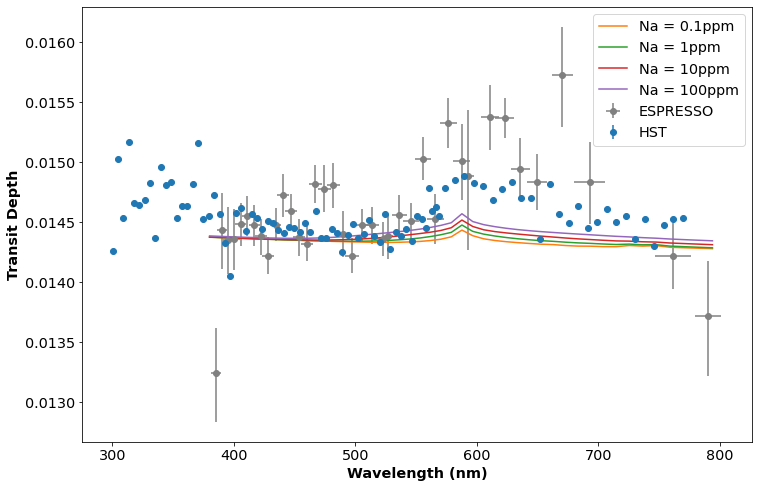

In [30]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot Espresso Data
ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)]**2, 
             yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
            xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

ax.errorbar(wavl_hst*0.1, (Rp_hst*Rj/(1.1*Rsun))**2, 
             yerr=(Rper_hst*Rj/(Rsun))**2, marker='o', linestyle='', label='HST')

ax.plot(wavl1,tott1, label='Na = 0.1ppm')

ax.plot(wavl2,tott2,label='Na = 1ppm')

ax.plot(wavl3,tott3, label='Na = 10ppm')

ax.plot(wavl4,tott4, label='Na = 100ppm')


ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()

plt.savefig("NaTest_PSG_Venot.jpg", dpi=150)


In [64]:
wavl5, tott5, trans5 = read_radfile('HD_209458b/psg_rad_Venot_Na_1_TiO_0_1.txt')
wavl6, tott6, trans6 = read_radfile('HD_209458b/psg_rad_Venot_Na_1_TiO_1.txt')
wavl7, tott7, trans7 = read_radfile('HD_209458b/psg_rad_Venot_Na_1_TiO_10.txt')
wavl8, tott8, trans8 = read_radfile('HD_209458b/psg_rad_Venot_Na_1_TiO_100.txt')

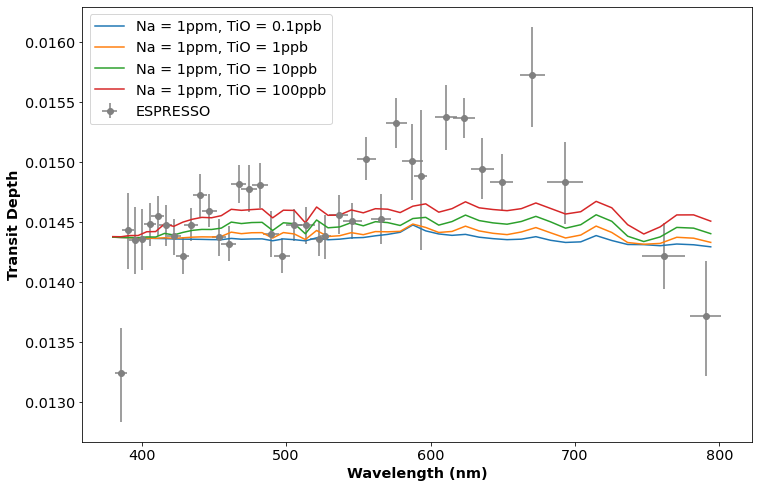

In [67]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot ESPRESSO/VLT spectrum from Santos et al.
ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)]**2, 
             yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
            xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

#Plot PSG spectra
ax.plot(wavl5,tott5, label='Na = 1ppm, TiO = 0.1ppb')

ax.plot(wavl6,tott6,label='Na = 1ppm, TiO = 1ppb')

ax.plot(wavl7,tott7, label='Na = 1ppm, TiO = 10ppb')

ax.plot(wavl8,tott8, label='Na = 1ppm, TiO = 100ppb')


ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()

plt.savefig("NaTiO_PSG_Venot.jpg", dpi=150)



In [68]:
wavl9, tott9, trans9 = read_radfile('HD_209458b/psg_rad_Venot_Na_1_TiO_1_Li_1.txt')

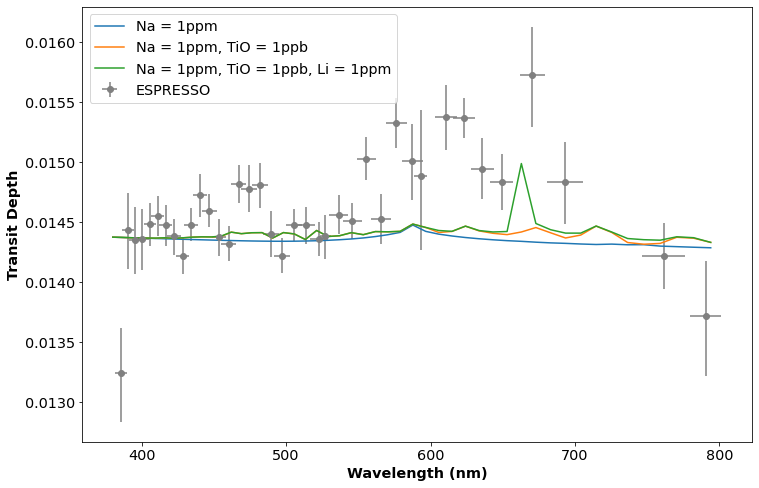

In [70]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot ESPRESSO/VLT spectrum from Santos et al.
ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)]**2, 
             yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
            xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

#Plot PSG spectra
ax.plot(wavl2,tott2, label='Na = 1ppm')

ax.plot(wavl6,tott6,label='Na = 1ppm, TiO = 1ppb')

ax.plot(wavl9,tott9, label='Na = 1ppm, TiO = 1ppb, Li = 1ppm')


ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()

plt.savefig("NaTiOLi_PSG_Venot.jpg", dpi=150)



In [28]:
diff_es=[] #Difference of consecutive wavlength up or down values
for i in range(2,len(wavlu_es)-1):
    diff_es.append((wavlu_es[i+1]-wavlu_es[i])/2)

In [30]:
diff_=[] #Difference of wavelength values from PSG
for i in range(len(wavl)-1):
    diff_.append(wavl[i+1]-wavl[i])

# Parmentier and Kempton Models

Below we try to fit Na as suggested in Santos et al. The Na atmospheric abundance is varied as 0.1, 1.0 and 10.0 ppm, assuming the vertical profile is a straight line for the pressure range of 1000 bar to 1 microbar. The parameters are kept as close to the ones mentioned in the paper with C/O ratio equal to 0.6.

In [43]:
#Load data from PSG data files

# wavl1, tott1, trans1 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na3.txt')

wavl1, tott1, trans1 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_01.txt')
wavl2, tott2, trans2 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1.txt')
wavl3, tott3, trans3 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_10.txt')

wavl4, tott4, trans4 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1e2.txt')
wavl5, tott5, trans5 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1e3.txt')
wavl6, tott6, trans6 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1e7.txt')

In [33]:
diff_rp=np.zeros_like(wavl2)
for i in range(len(tott2)):
    idx=(np.abs(wavlu_es-wavl2[i])).argmin()
    diff_rp[i]=Rp_es[idx]**2-tott2[i]

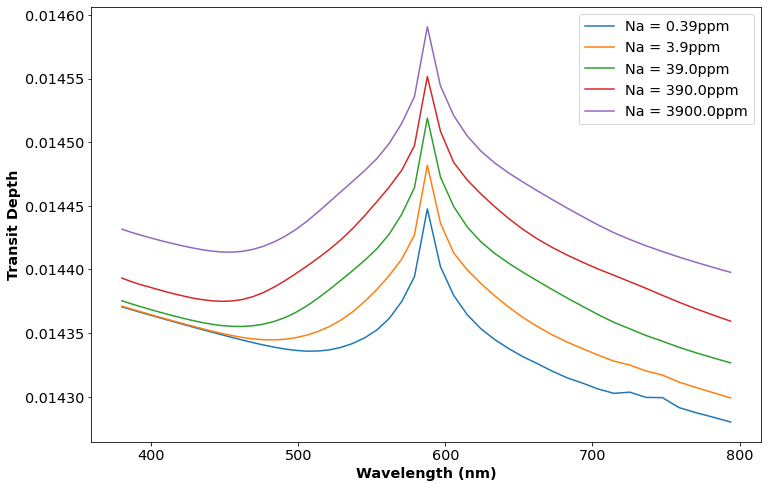

In [44]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot ESPRESSO/VLT spectrum from Santos et al.
#  ax.errorbar(wavlu_es[2:len(Rp_es)], (Rp_es[2:len(Rp_es)])**2, 
#              yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
#             xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

#Plot PSG spectra

# ax.plot(wavl1,tott1, label='Na = 1ppm')

ax.plot(wavl1,tott1, label='Na = 0.39ppm')

ax.plot(wavl2,tott2,label='Na = 3.9ppm') #Model=3.9ppm

ax.plot(wavl3,tott3, label='Na = 39.0ppm')

ax.plot(wavl4,tott4, label='Na = 390.0ppm')

ax.plot(wavl5,tott5, label='Na = 3900.0ppm')



# ax.plot(wavl6,tott6,'.', label='Na = 1e7x')


ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()

# plt.savefig("NaTestnoespresso_PSG.jpg", dpi=150)


Adding TiO and Li to the atmospheric template with Na = 3.9ppm.

#Check temperature (because of the metallicity change)! **TiO profile?**
Does resolution matter?

In [66]:
# wavl1, tott1, trans1 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_1ppb.txt')
# wavl2, tott2, trans2 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1e3_TiO_0_1.txt')
# wavl3, tott3, trans3 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1e3_TiO_0_01.txt')

# wavl4, tott4, trans4 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_1e3_TiO_0_1_Li_1.txt')

wavl1, tott1, trans1 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_01ppb.txt')
wavl3, tott3, trans3 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_1ppb2.txt')
wavl5, tott5, trans5 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_10ppb.txt')
wavl4, tott4, trans4 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_100ppb.txt')

# wavl5, tott5, trans5 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_1ppb_Li_1ppm.txt') #1ppb what happened here?
# wavl6, tott6, trans6 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_1ppb_Li_1ppm2.txt') #1.33ppb
wavl7, tott7, trans7 = read_radfile('HD_209458b/Parmentier/0_6/psg_rad_Na_TiO_1ppb_Li_1ppm3.txt') #1ppb use this


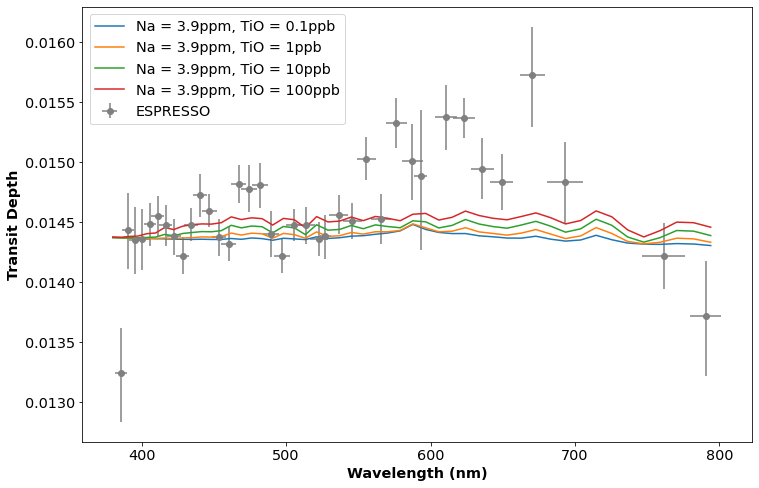

In [68]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot ESPRESSO/VLT spectrum from Santos et al.
ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)]**2, 
             yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
            xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

#Plot PSG spectra
# ax.plot(wavl5,tott5,label='Na = 1e3 x 3.9ppm (Model)')

ax.plot(wavl1,tott1, label='Na = 3.9ppm, TiO = 0.1ppb')
# ax.plot(wavl2,tott2, label='Na = 3.9ppm')
ax.plot(wavl3,tott3,label='Na = 3.9ppm, TiO = 1ppb')
ax.plot(wavl5,tott5,label='Na = 3.9ppm, TiO = 10ppb')
ax.plot(wavl4,tott4,label='Na = 3.9ppm, TiO = 100ppb')

# ax.plot(wavl5,tott5,label='TiO = 1ppb Li=1ppm')
# ax.plot(wavl6,tott6,label='TiO = 1ppb Li=1ppm2')
# ax.plot(wavl7,tott7,label='Na = 3.9ppm, TiO = 1ppb Li = 1ppm')


# ax.plot(wavl4,tott4,'.', label='Na = 1e3 x 3.9ppm , TiO = 0.1ppm, Li = 1ppm')




ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()

plt.savefig("NaTiO_PSG.jpg", dpi=150)



HD209458b - Metallicity [Fe/H] that of the sun (0) - all stars with metallicity greater (less) than 0 - mental rich (metal poor) 
sensitivity to solar C/O ratio - not very well constrained? What is the range of values we can play with? - Olivier and Eduardo - Madhusudhan et al. 2012

Clouds - different heights, abundances, radius (1 micron) - plot and interpret - flattened spectra - increase rayleigh scattering part (expected)

Could do something like the table in welbanks and madhusudhan 2019

First study - high resolution (unbinned spectra) - bin after - undersampling? - Santos et al. Not pure transit spectra, calculated using RM effect
with command curl 

Espresso - high resolution - for radial velocity detection technique - 

**C/O Ratio Sensitivity Test**

In [42]:
wavl1, tott1, trans1 = read_radfile('HD_209458b/Parmentier/C_O Sensitivity Tests/psg_rad_0_2.txt')
wavl2, tott2, trans2 = read_radfile('HD_209458b/Parmentier/C_O Sensitivity Tests/psg_rad_0_6.txt')
wavl3, tott3, trans3 = read_radfile('HD_209458b/Parmentier/C_O Sensitivity Tests/psg_rad_0_8.txt')



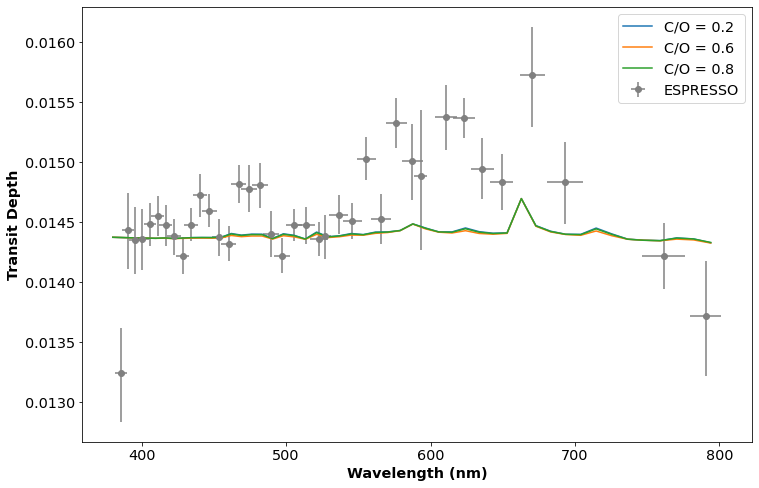

In [43]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot ESPRESSO/VLT spectrum from Santos et al.
ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)]**2, 
             yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
            xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

#Plot PSG spectra
# ax.plot(wavl5,tott5,label='Na = 1e3 x 3.9ppm (Model)')

ax.plot(wavl1,tott1, label='C/O = 0.2')
ax.plot(wavl2,tott2, label='C/O = 0.6')
ax.plot(wavl3,tott3, label='C/O = 0.8')


# ax.set_title("C/O Ratio Sensitivity")


ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()

plt.savefig("C_O_sens1.jpg", dpi=150)


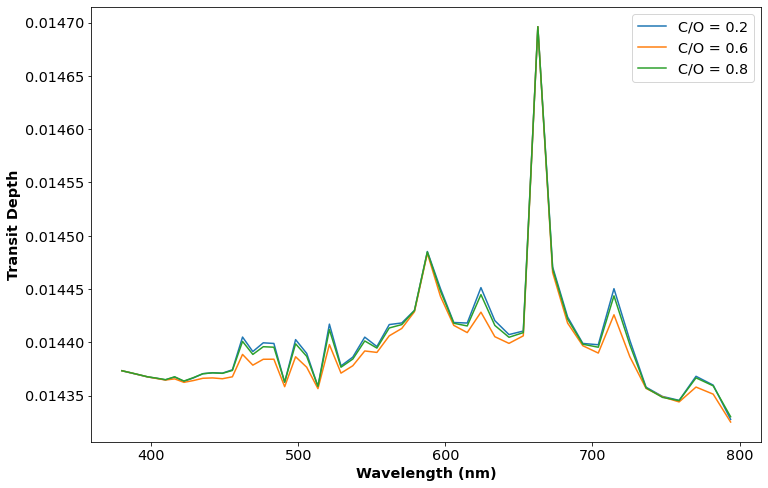

In [51]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Plot ESPRESSO/VLT spectrum from Santos et al.
# ax.errorbar(wavlu_es[2:len(Rp_es)], Rp_es[2:len(Rp_es)]**2, 
#              yerr=[Rp_eru_sq[2:len(Rp_es)], Rp_erd_sq[2:len(Rp_es)]], 
#             xerr=diff[2:len(Rp_es)], marker='o', linestyle='', color='grey', label='ESPRESSO')

#Plot PSG spectra
# ax.plot(wavl5,tott5,label='Na = 1e3 x 3.9ppm (Model)')

ax.plot(wavl1,tott1, label='C/O = 0.2')
ax.plot(wavl2,tott2, label='C/O = 0.6')
ax.plot(wavl3,tott3, label='C/O = 0.8')

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Transit Depth")

ax.legend()
plt.savefig("C_O_sens2.jpg", dpi=150)

Put results in report 

Send Edurado/Olivier email 

Increase resolution?
Why Li, Na not affected - but TiO is?

Plot the increased resolution data
Try PetitRadTrans


## Parmentier Kempton - Atmosphere Profiles

In [70]:
fname='HD_209458b/Parmentier/0_6/psg_cfg_Na2.txt'
data_pkatm = open(fname, 'r' )
data_pkatm=data_pkatm.read().splitlines()

In [71]:
data_pkatm

['<OBJECT>Exoplanet',
 '<OBJECT-NAME>HD209458b',
 '<OBJECT-DATE>2018/09/21 12:33',
 '<OBJECT-DIAMETER>192954',
 '<OBJECT-GRAVITY>1.49000',
 '<OBJECT-GRAVITY-UNIT>rho',
 '<OBJECT-STAR-DISTANCE>0.0475',
 '<OBJECT-STAR-VELOCITY>0.08484',
 '<OBJECT-SOLAR-LONGITUDE>0.0',
 '<OBJECT-SOLAR-LATITUDE>0.00',
 '<OBJECT-SEASON>180.00',
 '<OBJECT-STAR-TYPE>G',
 '<OBJECT-STAR-TEMPERATURE>6091.0',
 '<OBJECT-STAR-RADIUS>1.162',
 '<OBJECT-OBS-LONGITUDE>-180.00',
 '<OBJECT-OBS-LATITUDE>3.29',
 '<OBJECT-OBS-VELOCITY>-14.900',
 '<OBJECT-PERIOD>3.525',
 '<OBJECT-STAR-METALLICITY>0.010',
 '<OBJECT-PERIAPSIS>0.00',
 '<OBJECT-ECCENTRICITY>0.00000',
 '<OBJECT-INCLINATION>86.71',
 '<GEOMETRY>Observatory',
 '<GEOMETRY-OFFSET-NS>0.0',
 '<GEOMETRY-OFFSET-EW>0.0',
 '<GEOMETRY-OFFSET-UNIT>arcsec',
 '<GEOMETRY-OBS-ALTITUDE>48.3700',
 '<GEOMETRY-ALTITUDE-UNIT>pc',
 '<GEOMETRY-USER-PARAM>0.0',
 '<GEOMETRY-STELLAR-TYPE>G',
 '<GEOMETRY-STELLAR-TEMPERATURE>5777',
 '<GEOMETRY-STELLAR-MAGNITUDE>0',
 '<GEOMETRY-SOLAR-ANGLE>89

In [72]:
molc=[x for x in data_pkatm if '<ATMOSPHERE-GAS>' in x]
molc=molc[0].split('>')[1].split(',')

In [73]:
molc

['H2', 'He', 'CO', 'H2O', 'CH4', 'CO2', 'O2', 'Na']

In [74]:
molc_all=[x for x in data_pkatm if '<ATMOSPHERE-LAYERS-MOLECULES>' in x]
molc_all=molc_all[0].split('>')[1].split(',')

In [75]:
#Number of atmospheric layers
ln=[x for x in data_pkatm if '<ATMOSPHERE-LAYERS>' in x]
ln=int(ln[0].split('>')[1])

In [76]:
#Layer wise extraction
val=np.zeros([ln,len(molc_all)+2])
for i in range(ln):
    temp=0
    temp=[x for x in data_pkatm if '<ATMOSPHERE-LAYER-'+str(i+1)+'>' in x]
    val[i,:]=temp[0].split('>')[1].split(',')

In [77]:
ind_molc=[]
for i in range(len(molc)):
    ind_molc.append(molc_all.index(molc[i]))
    

In [78]:
ind_molc

[0, 1, 2, 3, 9, 15, 30, 8]

In [79]:
val

array([[1.0000e+03, 2.0419e+03, 8.3662e-01, ..., 1.5778e-16, 1.4174e-21,
        2.4241e-30],
       [6.5513e+02, 1.8300e+03, 8.3684e-01, ..., 1.4111e-18, 2.9087e-23,
        4.6301e-33],
       [4.2919e+02, 1.7780e+03, 8.3689e-01, ..., 6.7682e-19, 1.2451e-23,
        1.0971e-33],
       ...,
       [2.3300e-06, 1.1660e+03, 8.3736e-01, ..., 1.4115e-25, 1.0494e-28,
        5.3964e-41],
       [1.5264e-06, 1.1660e+03, 8.3733e-01, ..., 1.4154e-25, 1.2888e-28,
        8.1655e-41],
       [1.0000e-06, 1.1660e+03, 8.3731e-01, ..., 1.4194e-25, 1.5829e-28,
        1.2356e-40]])

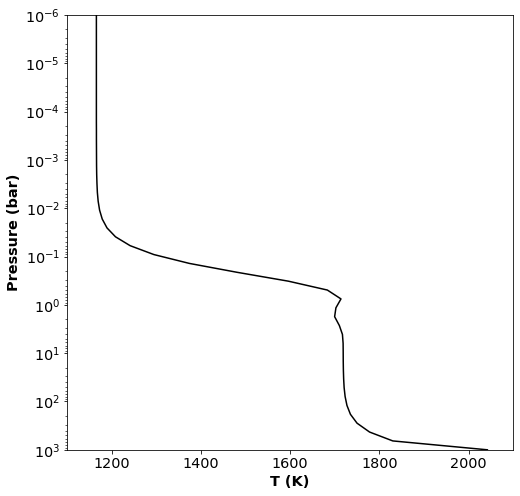

In [80]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(val[:,1], np.transpose(val[:,0]), 'k')
plt.gca().invert_yaxis()
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel("Pressure (bar)")

plt.xlim(1100, 2100)
plt.ylim(1e3, 1e-6 )

plt.savefig("ThermalProf_PK.jpg", dpi=150)


In [98]:
str(val[:,1])

'[2041.9 1830.  1778.  1749.9 1735.1 1727.3 1723.2 1721.  1719.9 1719.3\n 1719.  1718.9 1718.7 1717.2 1710.3 1699.7 1702.6 1713.9 1683.4 1596.1\n 1481.1 1374.4 1294.7 1241.6 1208.8 1189.8 1179.1 1173.2 1170.  1168.2\n 1167.3 1166.7 1166.4 1166.3 1166.2 1166.1 1166.1 1166.  1166.  1166.\n 1166.  1166.  1166.  1166.  1166.  1166.  1166.  1166.  1166.  1166. ]'

In [126]:
val[:, 9]

array([2.8545e-05, 2.9842e-05, 2.9831e-05, 2.9859e-05, 2.9901e-05,
       2.9913e-05, 2.9022e-05, 2.7429e-05, 2.5883e-05, 2.4410e-05,
       2.3015e-05, 2.1856e-05, 2.1999e-05, 2.2125e-05, 2.2212e-05,
       2.2336e-05, 2.2552e-05, 2.2525e-05, 2.2536e-05, 2.3005e-05,
       2.4746e-05, 2.7824e-05, 3.0552e-05, 3.0336e-05, 3.0301e-05,
       3.0337e-05, 3.0373e-05, 3.0414e-05, 3.0281e-05, 3.0106e-05,
       2.9936e-05, 2.9770e-05, 2.9606e-05, 2.9429e-05, 2.9224e-05,
       2.9022e-05, 2.8822e-05, 2.8623e-05, 2.8425e-05, 2.8094e-05,
       2.7749e-05, 2.7409e-05, 2.7073e-05, 2.6741e-05, 2.5945e-05,
       2.4614e-05, 2.3352e-05, 2.2155e-05, 2.1019e-05, 1.9942e-05])

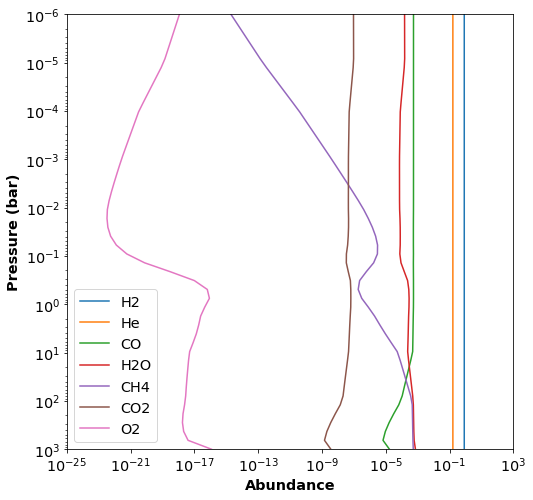

In [131]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ab_val=np.zeros([len(val[:,0]),len(ind_molc)-1])

#Write profile to a txt file

# file = open("PK_Profiles.txt", "w")
# file.write('#Molecules>')
for i in range(len(molc)-1):

    ax.plot(val[:, ind_molc[i]+2], np.transpose(val[:,0]), label=molc[i])
    ab_val[:,i]=val[:, ind_molc[i]+2] #Abundance values
#     file.write(molc[i]+',')
    
    
# for i in range(len(val[:,1])):
#     file.write(str([val[:,1], np.transpose(val[:,0]) ab_val]))


plt.gca().invert_yaxis()
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Abundance")
plt.ylabel("Pressure (bar)")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.legend(loc='lower left')

#Set x limits
plt.xlim(1e-25, 1e3)
# Set x ticks
# plt.xticks(1e0, 1e-4, 1e-8, 1e-12, 1e-16 )

# Set y limits
plt.ylim(1e3, 1e-6)
# Set y ticks
# plt.yticks(np.linspace(1e2, 1e-7, 7))

plt.savefig("AbundanceProf_PK.jpg", dpi=150)

plt.show()

In [ ]:
a_dict = {"P" : np.transpose(val[:,0]), "T" : val[:,1]}

file = open("PK_Profiles.txt", "w")
file.write('#Molecules>'+molc)
file.write(np.transpose(val[:,0]))
"\n" creates newline for next write to file

file.close()

In [96]:
file = open("PK_Profiles.txt", "w")
file.write('#Molecules>'+molc)

TypeError: can only concatenate str (not "list") to str

In [105]:
[val[:,1] , np.transpose(val[:,0]) , ab_val]

[array([2041.9, 1830. , 1778. , 1749.9, 1735.1, 1727.3, 1723.2, 1721. ,
        1719.9, 1719.3, 1719. , 1718.9, 1718.7, 1717.2, 1710.3, 1699.7,
        1702.6, 1713.9, 1683.4, 1596.1, 1481.1, 1374.4, 1294.7, 1241.6,
        1208.8, 1189.8, 1179.1, 1173.2, 1170. , 1168.2, 1167.3, 1166.7,
        1166.4, 1166.3, 1166.2, 1166.1, 1166.1, 1166. , 1166. , 1166. ,
        1166. , 1166. , 1166. , 1166. , 1166. , 1166. , 1166. , 1166. ,
        1166. , 1166. ]),
 array([1.0000e+03, 6.5513e+02, 4.2919e+02, 2.8118e+02, 1.8421e+02,
        1.2068e+02, 7.9060e+01, 5.1795e+01, 3.3932e+01, 2.2230e+01,
        1.4563e+01, 9.5410e+00, 6.2506e+00, 4.0949e+00, 2.6827e+00,
        1.7575e+00, 1.1514e+00, 7.5431e-01, 4.9417e-01, 3.2375e-01,
        2.1210e-01, 1.3895e-01, 9.1030e-02, 5.9636e-02, 3.9069e-02,
        2.5595e-02, 1.6768e-02, 1.0985e-02, 7.1969e-03, 4.7149e-03,
        3.0888e-03, 2.0236e-03, 1.3257e-03, 8.6851e-04, 5.6899e-04,
        3.7276e-04, 2.4421e-04, 1.5999e-04, 1.0481e-04, 6.8665e-05

In [113]:
for i in range(3):
    print(str([val[i,1], np.transpose(val[i,0]), ab_val[i]]))

SyntaxError: invalid syntax (<ipython-input-113-fcab7e0bfd81>, line 2)

In [112]:
ab_val[0]

array([1.0000e+03, 6.5513e+02, 4.2919e+02, 2.8118e+02, 1.8421e+02,
       1.2068e+02, 7.9060e+01, 5.1795e+01, 3.3932e+01, 2.2230e+01,
       1.4563e+01, 9.5410e+00, 6.2506e+00, 4.0949e+00, 2.6827e+00,
       1.7575e+00, 1.1514e+00, 7.5431e-01, 4.9417e-01, 3.2375e-01,
       2.1210e-01, 1.3895e-01, 9.1030e-02, 5.9636e-02, 3.9069e-02,
       2.5595e-02, 1.6768e-02, 1.0985e-02, 7.1969e-03, 4.7149e-03,
       3.0888e-03, 2.0236e-03, 1.3257e-03, 8.6851e-04, 5.6899e-04,
       3.7276e-04, 2.4421e-04, 1.5999e-04, 1.0481e-04, 6.8665e-05,
       4.4984e-05, 2.9471e-05, 1.9307e-05, 1.2649e-05, 8.2864e-06,
       5.4287e-06, 3.5565e-06, 2.3300e-06, 1.5264e-06, 1.0000e-06])